# Polycrystalline graphene



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from psm.segments import Segments
from psm.build import regular_polygons
from psm import plotutils

from tqdm import tqdm as tqdm

## Sample Structure

(-2.4422123245680005, 52.486549836408, -2.49008957172, 52.46567162532)

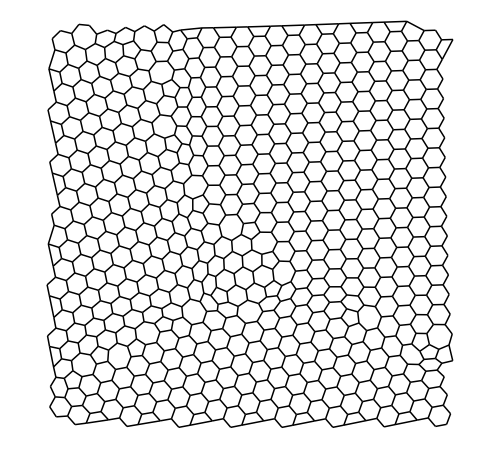

In [139]:
points = np.load('data/poly_graphene.npy')

segments = Segments(points)
segments.build_graph(1.2)
fig,ax=plt.subplots(1,1,figsize=(8,8))
segments.show_edges(ax=ax);
ax.axis('off')


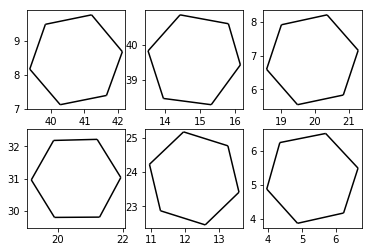

In [140]:
segments.faces(remove_hull=True)
segments.show(6, nrows=2);

## Template structure

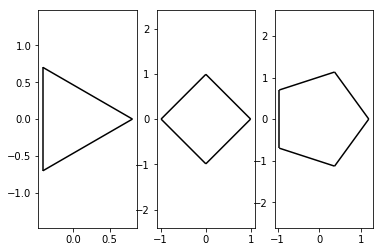

In [141]:
templates = regular_polygons(1.4, [3,4,5,6,7,8])
templates.show(3);

## Pairing

In [142]:
rmsd = segments.register(templates, transform='similarity', pivot='cop')

 [||||||||||||||||||||] 2448/2448 registrations


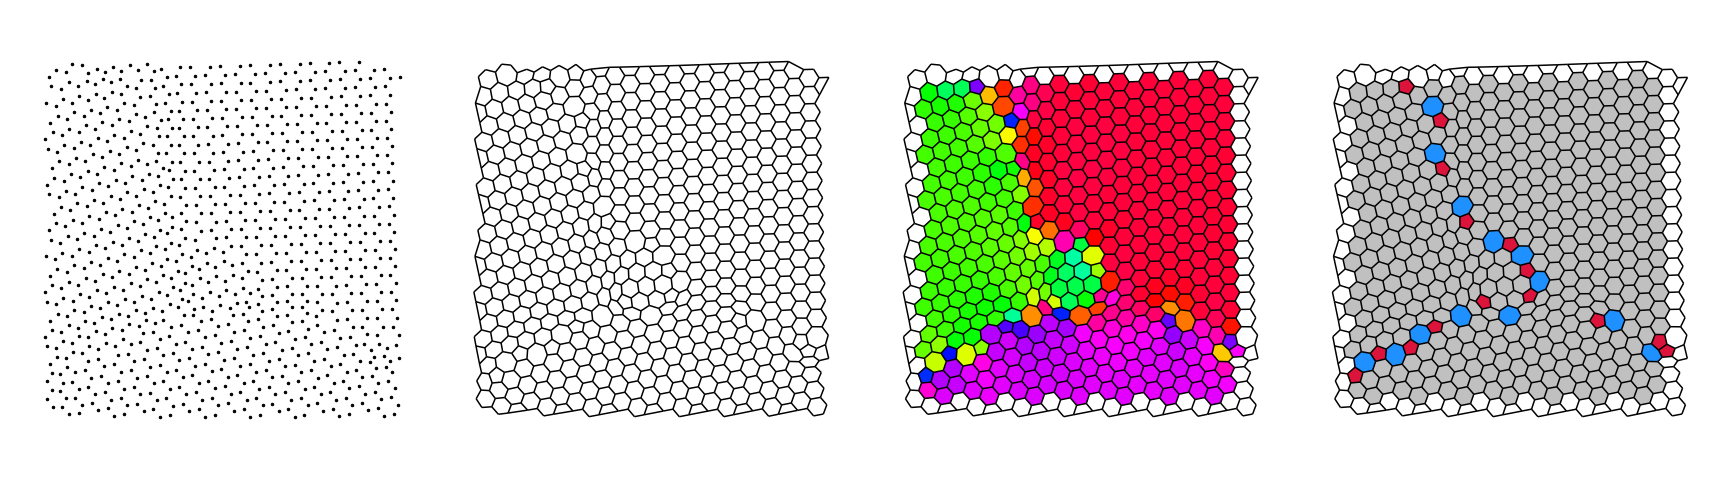

In [179]:
best_match, best_rmsd = segments.best_matches()

from psm.plotutils import add_patches

fig,axes = plt.subplots(1,4,figsize=(24,7))

ax = axes[0]
ax.plot(*points.T, 'k.', markersize=5)
ax.axis('off')
ax.axis('equal')

ax = axes[1]
segments.show_edges(ax=ax);
ax.axis('off')
ax.axis('equal')

ax = axes[3]
polygons = [segment.points for segment in segments]
colors = ['crimson','silver','dodgerblue']
segments.show_edges(ax=ax);

i=0
for n in np.unique(best_match):
    p = [polygons[i] for i in np.where(best_match==n)[0]]
    c = colors[i]
    i+=1
    add_patches(p, ax, c=c)

ax.set_xlim([0,50])
ax.set_ylim([0,50])

ax.axis('off')
ax.axis('equal')

strain, rotation = segments.calc_strain()
rotation = (rotation % (2*np.pi/6)) / np.pi * 180

ax = axes[2]
segments.show_edges(ax=ax);
add_patches(polygons, ax, c=rotation, cmap='hsv')
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.axis('off')
ax.axis('equal')

plt.tight_layout()
plt.savefig('psm.pdf')

In [7]:
import matplotlib.patches as mpatches

def add_labeled_patches(segments, labels, ax, colors, descriptions=None):
    
    if descriptions is None:
        descriptions = {label:label for label in labels}
    
    proxies=[]
    for label,color in zip(np.unique(labels), plt.cm.Dark2.colors):
        label_faces = [segment for segment, has_label in zip(segments, label == labels) if has_label]
        
        plotutils.add_patches(points, label_faces, c=color, ax=axes[1])
        
        proxies.append(mpatches.Patch(color=color, label=descriptions[label]))

    ax.legend(handles=proxies)

AttributeError: module 'psm.plotutils' has no attribute 'segment_plot'

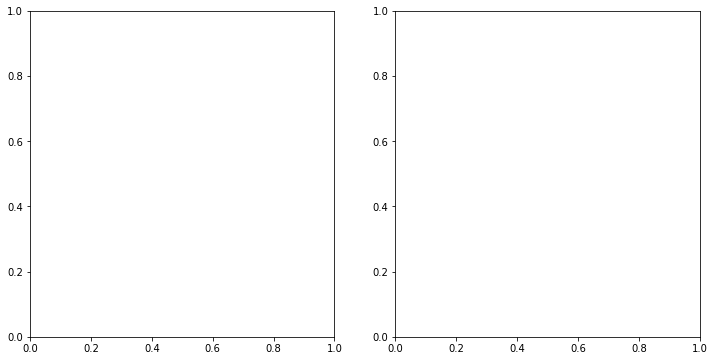

In [8]:
best_match, best_rmsd = segments.best_matches()

fig,axes = plt.subplots(1,2,figsize=(12,6))

_, p = plotutils.segment_plot(segments, axes[0], c=best_rmsd, cmap='viridis', vmin=0, vmax=.02)
plotutils.add_colorbar(axes[0], label='RMSD', cmap='viridis', vmin=0, vmax=.02)

_, p = plotutils.segment_plot(segments, axes[1], labels=best_match, cmap=plt.cm.Dark2.colors)

for ax in axes.ravel():
    ax.axis('equal')
    ax.axis('off')

## Strain

In [9]:
strain, rotation = rmsd_calc.calc_strain(structures)
strain = transform.zero_median(strain)

planar = transform.planar_strain(strain)
shear = strain[:,0,1]
rotation = (rotation % (2*np.pi/6)) / np.pi * 180 

fig,axes = plt.subplots(1,3,figsize=(13,6))

p = plotutils.add_patches(points, faces, c=planar, ax=axes[0], clim=[-.1,.1], cmap='coolwarm')
plotutils.add_colorbar(p, axes[0], 'bottom', label='Planar Strain', ticks=np.linspace(-.1,.1,5))

p = plotutils.add_patches(points, faces, c=shear, ax=axes[1], clim=[-.1,.1], cmap='coolwarm')
plotutils.add_colorbar(p, axes[1], 'bottom', label='Shear Strain', ticks=np.linspace(-.1,.1,5))

p = plotutils.add_patches(points, faces, c=rotation, ax=axes[2], clim=[0,60], cmap='hsv')
plotutils.add_colorbar(p, axes[2], 'bottom', label='Rotation [deg.]')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

NameError: name 'rmsd_calc' is not defined